# German credit risk

In [83]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import category_encoders as ce


In [84]:
data_file = "../csv/german_credit/german_credit_data.csv"
dataset = pd.read_csv(data_file, index_col=0)
ds = dataset.copy()
ds.head(15)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


## EDA

In [85]:
ds.isna().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
dtype: bool

### Age

<AxesSubplot:>

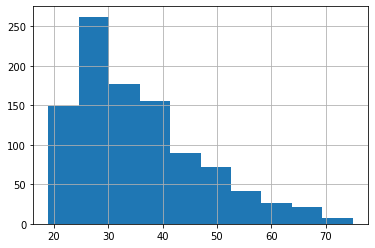

In [86]:
ds['Age'].hist()

### Sex

<AxesSubplot:>

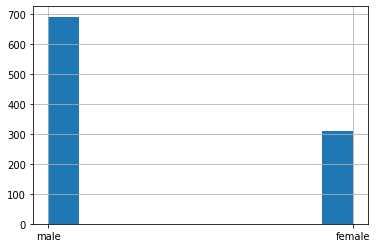

In [87]:
ds['Sex'].hist()

In [88]:
to_drop = []
ds['Sex_num'] = ds['Sex'].apply(lambda x: 0 if x == ' male' else 1)
to_drop.append('Sex')

### Job

<AxesSubplot:>

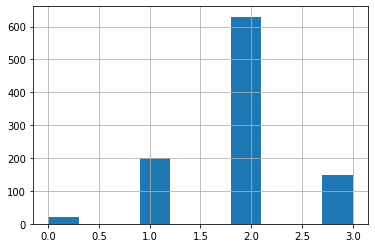

In [89]:
ds['Job'].hist()

### Housing

<AxesSubplot:>

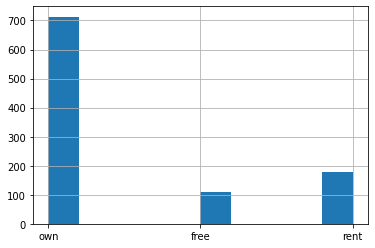

In [90]:
ds['Housing'].hist()

In [91]:
ds['Housing_num'] = ds['Housing'].apply(lambda x: 0 if x == 'own' else 1 if x == 'free' else 2)
to_drop.append('Housing')

### Saving accounts

<AxesSubplot:>

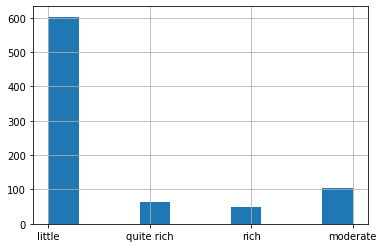

In [92]:
ds['Saving accounts'].hist()

In [93]:
ds['Saving accounts'].fillna('no', inplace=True)

<AxesSubplot:>

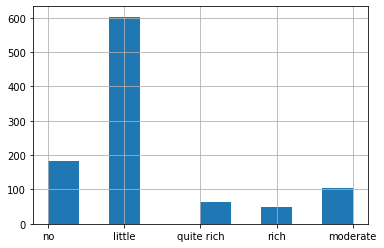

In [94]:
ds['Saving accounts'].hist()

In [95]:
savings = {'no': 0, 'little':1, 'moderate':2,  'quite rich': 3, 'rich': 4}
ds['Savings_num'] = ds['Saving accounts'].apply(savings.get)

<AxesSubplot:>

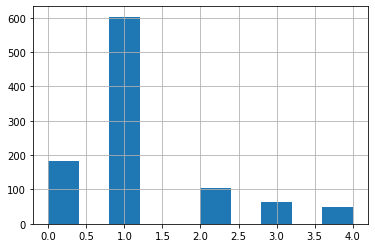

In [96]:
ds['Savings_num'].hist()

### Checking account

<AxesSubplot:>

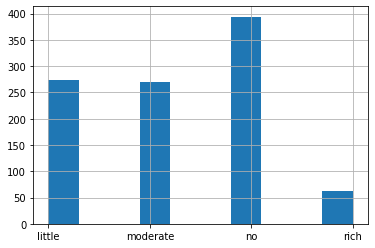

In [97]:
ds['Checking account'].fillna('no', inplace=True)
ds['Checking account'].hist()

In [98]:
checkings = {'no': 0, 'little':1, 'moderate':2, 'rich': 3}
ds['Checking_num'] = ds['Checking account'].apply(checkings.get)

<AxesSubplot:>

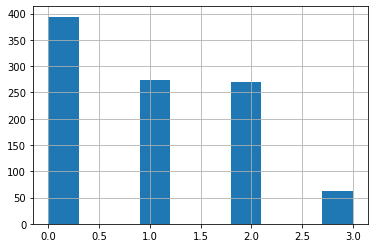

In [99]:
ds['Checking_num'].hist()

### Credit amount

<AxesSubplot:>

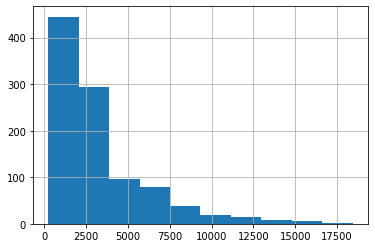

In [100]:
ds['Credit amount'].hist()

### Duration

<AxesSubplot:>

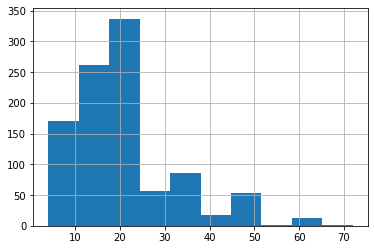

In [101]:
ds['Duration'].hist()

In [103]:
to_drop.extend(['Checking account', 'Saving accounts'])

### Purpose

<AxesSubplot:>

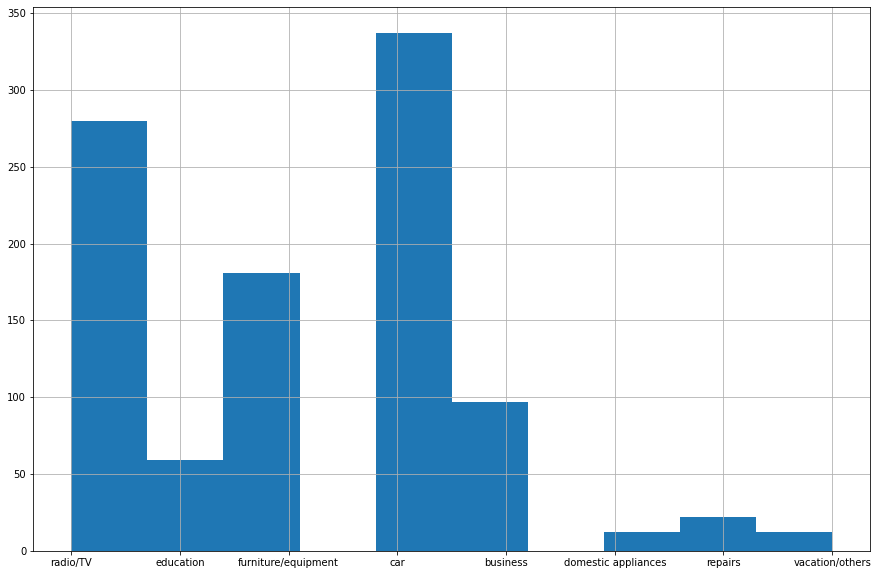

In [104]:
plt.figure(figsize=(15,10))
ds['Purpose'].hist()

<AxesSubplot:>

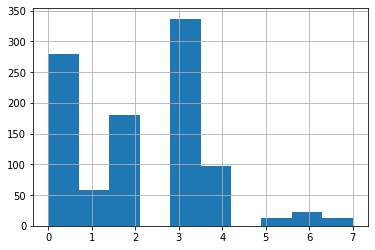

In [105]:
purpose = dict(zip(ds['Purpose'].unique(), range(len(ds['Purpose'].unique()))))
ds['Purpose_num'] = ds['Purpose'].apply(purpose.get)
ds['Purpose_num'].hist()

In [106]:
to_drop

['Sex', 'Housing', 'Checking account', 'Saving accounts']

In [107]:
to_drop.append('Purpose')

In [108]:
ds.drop(columns=to_drop)

,Age,Job,Credit amount,Duration,Sex_num,Housing_num,Savings_num,Checking_num,Purpose_num
0,67,2,1169,6,1,0,0,1,0
1,22,2,5951,48,1,0,1,2,0
2,49,1,2096,12,1,0,1,0,1
3,45,2,7882,42,1,1,1,1,2
4,53,2,4870,24,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,1,0,1,0,2
996,40,3,3857,30,1,0,1,1,3
997,38,2,804,12,1,0,1,0,0
998,23,2,1845,45,1,1,1,1,0


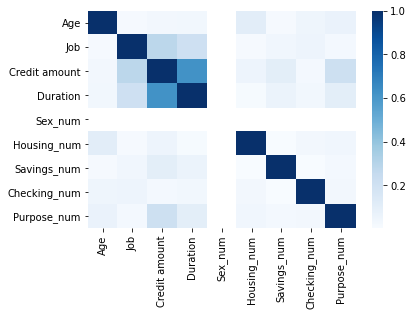

In [112]:
ax = sns.heatmap(ds.corr().abs(),cmap="Blues")

In [ ]:
plt.figure(figsize=(15,15))
ax = sns.PairGrid(ds.drop(columns=to_drop), palette="Set2")
ax = ax.map_diag(plt.hist, edgecolor="w")
ax = ax.map_offdiag(plt.scatter, edgecolor="w")
plt.show()

<Figure size 1080x1080 with 0 Axes>

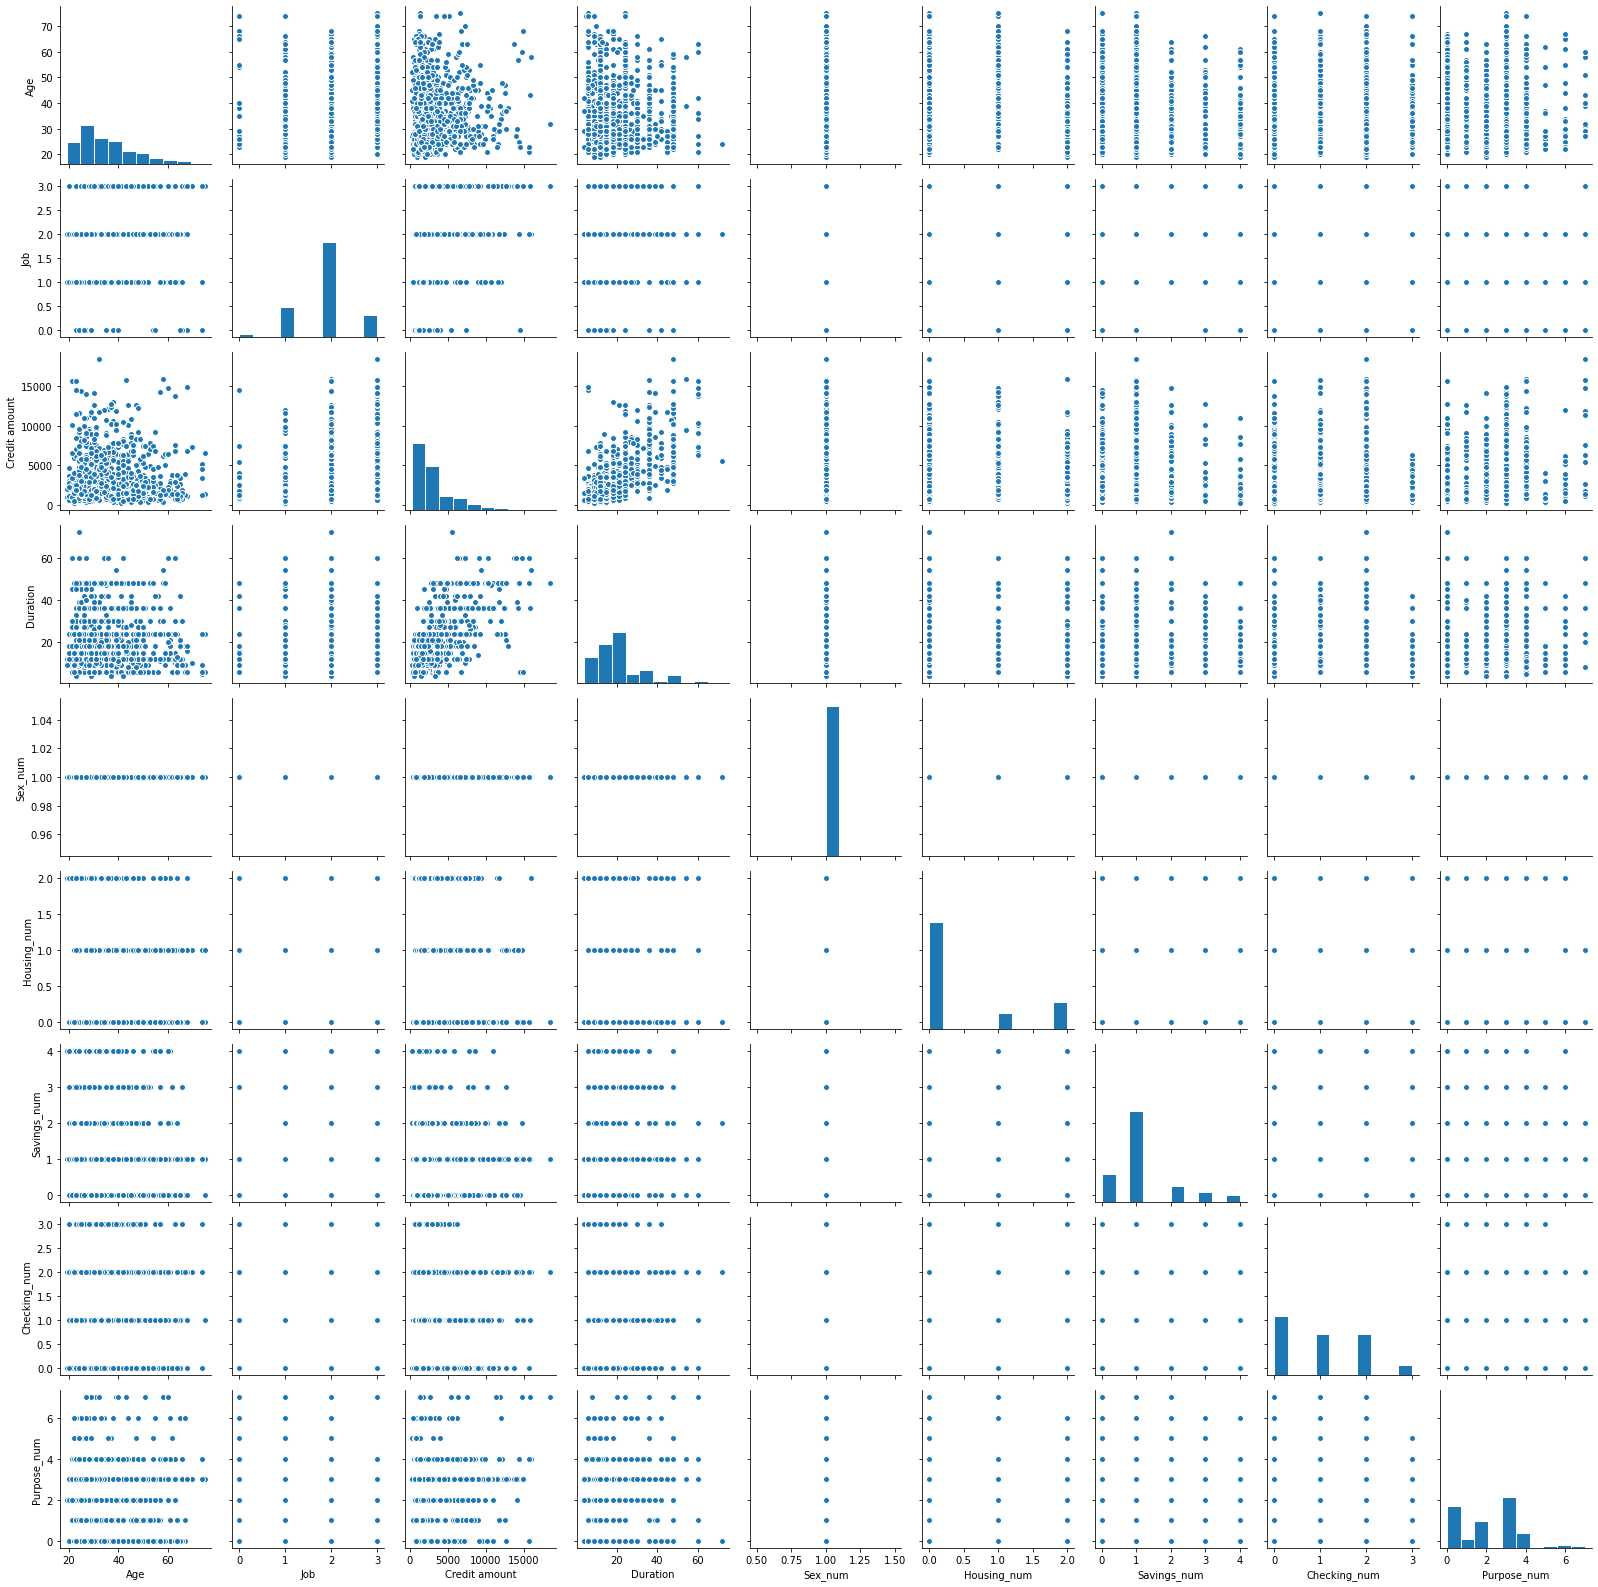

In [114]:
plt.figure(figsize=(15,15))
ax = sns.PairGrid(ds.drop(columns=to_drop), palette="Set2")
ax = ax.map_diag(plt.hist, edgecolor="w")
ax = ax.map_offdiag(plt.scatter, edgecolor="w")
plt.show()